[链接](https://cloud.tencent.com/developer/article/1346752)

In [39]:
import seaborn as sns

# 单样本t检验

Task1:汽车引擎是否满足排放标准？
“Super Engine”是一家专门生产汽车引擎的公司，根据政府发布的新排放要求，引擎排放平均值要低于20ppm。公司制造出10台引擎供测试使用，每一台的排放水平如下：
15.6 16.2 22.5 20.5 16.4 19.4 16.6 17.9 12.7 13.9
问题：公司生产的引擎是否符合政府规定呢？

$H_0:mean >= 20$  
$H_1:mean < 20$

In [2]:
data = np.array([15.6, 16.2, 22.5, 20.5, 16.4, 19.4, 16.6, 17.9, 12.7, 13.9])
data

array([15.6, 16.2, 22.5, 20.5, 16.4, 19.4, 16.6, 17.9, 12.7, 13.9])

In [3]:
from scipy import stats as st
td = st.t(len(data) - 1)

In [4]:
tval = (np.mean(data) - 20) / (np.std(data, ddof=1) / len(data) **(1/2))
tval
td.cdf(tval)

-3.001649525885985

0.0074582071244487635

In [5]:
tval, p = st.ttest_1samp(data, 20)
p / 2

0.0074582071244487635

+ 置信区间

In [6]:
np.mean(data) + td.ppf(0.05/2)*(np.std(data, ddof=1) / len(data) **(1/2))
np.mean(data) - td.ppf(0.05/2)*(np.std(data, ddof=1) / len(data) **(1/2))

15.037204443640903

19.302795556359094

# 正态性检验

In [4]:
from scipy import stats as st
# 正态分布测试


def check_normality(testData):
    # 20<样本数<50用normal test算法检验正态分布性
    if 20 < len(testData) < 50:
        p_value = st.normaltest(testData)[1]
        if p_value < 0.05:
            print("use normaltest")
            print("data are not normal distributed")
            return False
        else:
            print("use normaltest")
            print("data are normal distributed")
            return True

    # 样本数小于50用Shapiro-Wilk算法检验正态分布性
    if len(testData) < 50:
        p_value = st.shapiro(testData)[1]
        if p_value < 0.05:
            print("use shapiro:")
            print("data are not normal distributed")
            return False
        else:
            print("use shapiro:")
            print("data are normal distributed")
            return True

    if 300 >= len(testData) >= 50:
        p_value = st.diagnostic.lillifors(testData)[1]
        if p_value < 0.05:
            print("use lillifors:")
            print("data are not normal distributed")
            return False
        else:
            print("use lillifors:")
            print("data are normal distributed")
            return True

    if len(testData) > 300:
        p_value = st.kstest(testData, 'norm')[1]
        if p_value < 0.05:
            print("use kstest:")
            print("data are not normal distributed")
            return False
        else:
            print("use kstest:")
            print("data are normal distributed")
            return True

## Shapiro–Wilk W检验

+ 检验数据样本是否具有高斯分布。w检验是检验样本容量8≤n ≤50时，样本是否符合正态分布的一种方法。

+ 假设
    >每个样本中的观察是独立同分布的（iid）。

+ 解释
>H0：样本具有高斯分布。  
>H1：样本没有高斯分布。

In [7]:
from scipy import stats as st

In [8]:
data = np.random.randint(10, 100, 100) #随机选择数据
st.shapiro(data)

data = np.random.randn(100)
st.shapiro(data)

(0.960827648639679, 0.004608450923115015)

(0.9928040504455566, 0.8759610056877136)

## D’AGOSTINO’S K^2 TEST

+ 检验数据样本是否具有高斯分布。 20 <= n <= 50

+ 假设
>每个样本中的观察是独立同分布的（iid）。
+ 解释
>H0：样本具有高斯分布。  
>H1：样本没有高斯分布。

In [9]:
data = np.random.randint(10, 100, 100) #随机选择数据
st.normaltest(data)

data = np.random.randn(100)
st.normaltest(data)

NormaltestResult(statistic=38.53211403360539, pvalue=4.2939575784400775e-09)

NormaltestResult(statistic=0.0065376565713865, pvalue=0.9967365085168733)

## Anderson–Darling AD检验

+ 检验数据样本是否具有高斯分布。

+ 假设
>每个样本中的观察是独立同分布的（iid）。
+ 解释
>H0：样本具有高斯分布。  
>H1：样本没有高斯分布。

In [10]:
data = np.random.randint(10, 100, 100) #随机选择数据
st.anderson(data) #返回：statistic - 统计数；critical_values - 评判值；significance_level - 显著性水平

data = np.random.randn(100)
st.anderson(data)

AndersonResult(statistic=1.7491890616592372, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

AndersonResult(statistic=0.19270907485569921, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

# 相关性检验

## 皮尔逊相关系数( PEARSON CORRELATION COEFFICIENT）

+ 检验两个样本是否具有单调关系。  

+ 假设
>每个样本中的观察是独立同分布的（iid）。  
>每个样本的观察都是正态分布的。  
>每个样本中的观察具有相同的方差。
+ 解释 
>H0：两个样本是独立的。  
>H1：样本之间存在依赖关系。

In [11]:
np.random.seed(43)
data1 = np.random.randint(10, 100, 100) #随机选择数据
np.random.seed(43)
data2 = np.random.randint(10,50,100)
st.pearsonr(data1, data2)

np.random.seed(43)
data1 = np.random.randn(100)
data2 = data1 * 10
data2 = np.random.randn(100) * 10
st.pearsonr(data1, data2) # corr, p

(-0.17124860840568257, 0.08846244969274199)

(-0.12066459676011662, 0.23175490344138205)

## SPEARMAN相关系数（SPEARMAN’S RANK CORRELATION）

+ 检验两个样本是否具有单调关系。

+ 假设
>每个样本中的观察是独立同分布的（iid）。  
>可以对每个样本中的观察进行排序。
+ 解释
>H0：两个样本是独立的。  
>H1：样本之间存在依赖关系。

In [12]:
np.random.seed(43)
data1 = np.random.randint(10, 100, 100) #随机选择数据
np.random.seed(43)
data2 = np.random.randint(10,50,100)
st.spearmanr(data1, data2)

np.random.seed(43)
data1 = np.random.randn(100)
data2 = data1 * 10
st.spearmanr(data1, data2) # corr, p

SpearmanrResult(correlation=-0.1722918273032921, pvalue=0.08651034713559798)

SpearmanrResult(correlation=0.9999999999999999, pvalue=0.0)

## KENDALL秩相关系数（KENDALL’S RANK CORRELATION）

+ 检验两个样本是否具有单调关系。

+ 假设
>每个样本中的观察是独立同分布的（iid）。  
>可以对每个样本中的观察进行排序。
+ 解释
>H0：两个样本是独立的。  
>H1：样本之间存在依赖关系。

In [13]:
np.random.seed(43)
data1 = np.random.randint(10, 100, 100) #随机选择数据
np.random.seed(43)
data2 = np.random.randint(10,50,100)
st.kendalltau(data1, data2)

np.random.seed(43)
data1 = np.random.randn(100)
data2 = data1 * 10
st.kendalltau(data1, data2) # corr, p

KendalltauResult(correlation=-0.11650071147971187, pvalue=0.09146727172678412)

KendalltauResult(correlation=1.0, pvalue=2.143020576250934e-158)

# 参数统计假设检验

## T检验（STUDENT’S T-TEST）

+ 检验两个独立样本的均值是否存在显著差异。

+ 假设
>每个样本中的观察是独立同分布的（iid）。  
>每个样本的观察都是正态分布的。  
>每个样本中的观察具有相同的方差。
+ 解释
>H0：样本的均值相等。  
>H1：样本的均值不相等。

0.22125976711958253

array([-0.83315434,  1.23769101, -2.47573104, -1.03863091,  0.99464485,
        0.17822492, -0.48907961, -0.44208862, -0.25160849, -0.46864698,
       -0.67359719,  0.17144189])

-0.3408778747867168

Ttest_indResult(statistic=1.3809535172075822, pvalue=0.1825305658411529)

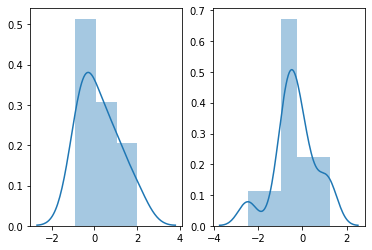

In [45]:
fig, axes = plt.subplots(1,2)
nd = st.norm()
data1 = nd.rvs(size=10, random_state=43)
sns.distplot(data1, ax=axes[0])
np.mean(data1)
data2 = nd.rvs(size=12, random_state=143)
data2
sns.distplot(data2, ax=axes[1])
np.mean(data2)
st.ttest_ind(data1, data2)

## 配对T检验（PAIRED STUDENT’S T-TEST）

+ 检验两个配对样本的均值是否存在显著差异。

+ 假设
>每个样本中的观察是独立同分布的（iid）。  
>每个样本的观察都是正态分布的。  
>每个样本中的观察具有相同的方差。  
>每个样本的观察结果是成对的。  
+ 解释
>H0：样本的均值相等。  
H1：样本的均值不相等。

In [68]:
np.random.seed(43)
data1 = np.random.randint(10, 20, 20)
data1

data2 = data1 + np.random.randn(20)
data2

array([14, 10, 11, 15, 10, 13, 11, 12, 17, 10, 13, 12, 19, 11, 12, 12, 13,
       15, 14, 14])

array([14.98683773, 11.82685531, 10.69605269, 13.8037441 , 11.20184169,
       14.52513977, 11.98548218, 11.74627728, 14.92895766, 11.60421338,
       12.61134427, 11.48088938, 19.56504662, 10.42669988, 11.15156679,
       10.19708491, 14.2736748 , 14.78360035, 13.65419663, 12.87077669])

In [69]:
st.ttest_rel(data1, data2)

Ttest_relResult(statistic=-0.06169740605058431, pvalue=0.9514482084477576)

# 非参数统计假设检验

## 曼-惠特尼U检验(MANN-WHITNEY U TEST)

+ 检验两个独立样本的分布是否相等。

+ 假设
>每个样本中的观察是独立同分布的（iid）。  
可以对每个样本中的观察进行排序。
+ 解释
>H0：两个样本的分布相等。  
H1：两个样本的分布不相等。

0.22125976711958253

array([-0.83315434,  1.23769101, -2.47573104, -1.03863091,  0.99464485,
        0.17822492, -0.48907961, -0.44208862, -0.25160849, -0.46864698,
       -0.67359719,  0.17144189])

-0.3408778747867168

MannwhitneyuResult(statistic=39.0, pvalue=0.08823085690121596)

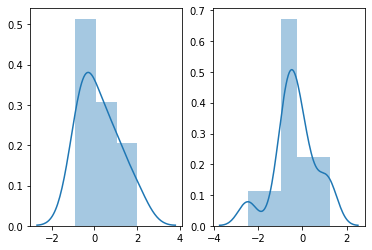

In [70]:
fig, axes = plt.subplots(1,2)
nd = st.norm()
data1 = nd.rvs(size=10, random_state=43)
sns.distplot(data1, ax=axes[0])
np.mean(data1)
data2 = nd.rvs(size=12, random_state=143)
data2
sns.distplot(data2, ax=axes[1])
np.mean(data2)
st.mannwhitneyu(data1, data2)

## 威尔科克森符号秩检验（WILCOXON SIGNED-RANK TEST）

+ 检验两个配对样本的分布是否均等。

+ 假设
>每个样本中的观察是独立同分布的（iid）。  
可以对每个样本中的观察进行排序。
+ 解释
>H0：两个样本的分布均等。  
H1：两个样本的分布不均等。

0.22125976711958253

array([-0.83315434,  1.23769101, -2.47573104, -1.03863091,  0.99464485,
        0.17822492, -0.48907961, -0.44208862, -0.25160849, -0.46864698])

-0.35883792054807506

WilcoxonResult(statistic=15.0, pvalue=0.20262160771231197)

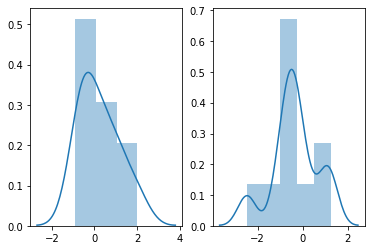

In [73]:
fig, axes = plt.subplots(1,2)
nd = st.norm()
data1 = nd.rvs(size=10, random_state=43)
sns.distplot(data1, ax=axes[0])
np.mean(data1)
data2 = nd.rvs(size=10, random_state=143)
data2
sns.distplot(data2, ax=axes[1])
np.mean(data2)
st.wilcoxon(data1, data2)

## KRUSKAL-WALLIS H检验（KRUSKAL-WALLIS H TEST）

+ 检验两个或多个独立样本的分布是否相等。

+ 假设
>每个样本中的观察是独立同分布的（iid）。  
可以对每个样本中的观察进行排序。
+ 解释
>H0：所有样本的分布均等。  
H1：一个或多个样本的分布不均等。

0.22125976711958253

-0.35883792054807506

0.06901564830243442

KruskalResult(statistic=1.537938196555217, pvalue=0.46349063540091273)

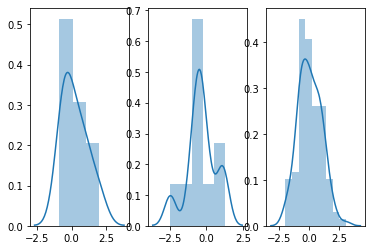

In [84]:
fig, axes = plt.subplots(1,3)
nd = st.norm()
data1 = nd.rvs(size=10, random_state=43)
sns.distplot(data1, ax=axes[0])
np.mean(data1)
data2 = nd.rvs(size=10, random_state=143)
sns.distplot(data2, ax=axes[1])
np.mean(data2)
data3 = nd.rvs(size=120, random_state=254)
sns.distplot(data3, ax=axes[2])
np.mean(data3)
st.kruskal(data1, data2, data3)

## FRIEDMAN检验（FRIEDMAN TEST）

+ 检验两个或更多配对样本的分布是否相等。

+ 假设
>每个样本中的观察是独立同分布的（iid）。  
可以对每个样本中的观察进行排序。  
每个样本的观察是成对的。
+ 解释
>H0：所有样本的分布均等。  
H1：一个或多个样本的分布不均等。

0.22125976711958253

-0.35883792054807506

0.21841557550987165

FriedmanchisquareResult(statistic=1.4000000000000057, pvalue=0.496585303791408)

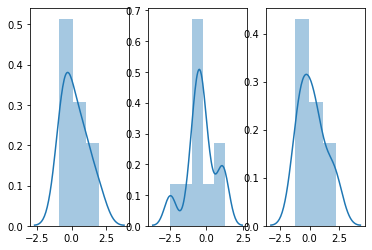

In [82]:
fig, axes = plt.subplots(1,3)
nd = st.norm()
data1 = nd.rvs(size=10, random_state=43)
sns.distplot(data1, ax=axes[0])
np.mean(data1)
data2 = nd.rvs(size=10, random_state=143)
sns.distplot(data2, ax=axes[1])
np.mean(data2)
data3 = nd.rvs(size=10, random_state=254)
sns.distplot(data3, ax=axes[2])
np.mean(data3)
st.friedmanchisquare(data1, data2, data3)